In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import dask.dataframe as dd
import numpy as np

Fremgang:  
1. Month 0(start data) - hvad er power consumption på alle 5 levels (Average hele måneden)
2. Month 1- hvordan har power consumption endret sig i forhold til month
3. For alle måneder: til sidst se om power consumption  øges over tid da filteret bliver mere tilstoppet

In [3]:
DF_FanLevel = pd.read_csv('FanLevel.csv')
DF_FanSpeedPower = pd.read_csv('FanSpeedPower.csv')
DF_InvSensor2022 = pd.read_csv('InvSensor2022.csv')
DF_InvSensor2023 = pd.read_csv('InvSensor2023.csv')

C:\Users\Mathi\AppData\Local\Temp\ipykernel_3544\4288095812.py:3: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  DF_InvSensor2022 = pd.read_csv('InvSensor2022.csv')


In [3]:
DF_FanLevel.set_index('time', inplace=True)
DF_FanSpeedPower.set_index('time', inplace=True)

merged_Fan = pd.concat([DF_FanLevel, DF_FanSpeedPower], axis=0)

In [4]:
merged_Fan

,name,activeauto,id,level,name.1,profile,power,speed_act,speed_set
time,,,,,,,,,
2022-07-29T03:43:27Z,FanLevel,0.0,6BE6E2E0,0.0,AirMaster2000,2.0,NaN,NaN,NaN
2022-07-29T03:43:36Z,FanLevel,0.0,6BE6E2E0,2.0,AirMaster2000,2.0,NaN,NaN,NaN
2022-07-29T03:43:40Z,FanLevel,0.0,6BE6E2E0,0.0,AirMaster2000,2.0,NaN,NaN,NaN
2022-07-29T04:00:31Z,FanLevel,0.0,6BE6E2E0,2.0,AirMaster2000,2.0,NaN,NaN,NaN
2022-07-29T04:00:49Z,FanLevel,0.0,6BE6E2E0,0.0,AirMaster2000,2.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2023-09-02T08:47:05Z,FanSpeedPower,NaN,1F988330,NaN,P88,NaN,46.0,975.0,975.0
2023-09-02T08:47:07Z,FanSpeedPower,NaN,6BE6E2E0,NaN,M88,NaN,12.0,616.0,616.0
2023-09-02T08:47:10Z,FanSpeedPower,NaN,1F988330,NaN,P88,NaN,47.0,975.0,975.0


In [8]:
id_value = '6BE6E2E0'

filtered_data1 = DF_FanLevel.loc[DF_FanLevel['id'] == id_value]
filtered_data2 = DF_FanSpeedPower.loc[DF_FanSpeedPower['id'] == id_value]
# Replace 'column1' and 'column2' with the names of the columns you want to plot
print(filtered_data1)
clean_column1 = filtered_data1['level'].dropna()
clean_column2 = filtered_data2['power'].dropna()

# Plot the cleaned data
plt.plot(clean_column1.index, clean_column1, label='level')
plt.plot(clean_column2.index, clean_column2, label='power')

# Set the title and labels for the axes
plt.title('Column Comparison Over Time for ID: {}'.format(id_value))
plt.xlabel('Time')
plt.ylabel('Value')

# Show the plot
plt.show()

                          name  activeauto        id  level         name.1  \
time                                                                         
2022-07-29T03:43:27Z  FanLevel           0  6BE6E2E0      0  AirMaster2000   
2022-07-29T03:43:36Z  FanLevel           0  6BE6E2E0      2  AirMaster2000   
2022-07-29T03:43:40Z  FanLevel           0  6BE6E2E0      0  AirMaster2000   
2022-07-29T04:00:31Z  FanLevel           0  6BE6E2E0      2  AirMaster2000   
2022-07-29T04:00:49Z  FanLevel           0  6BE6E2E0      0  AirMaster2000   
...                        ...         ...       ...    ...            ...   
2023-08-28T13:15:45Z  FanLevel           1  6BE6E2E0      2            M88   
2023-08-29T03:03:39Z  FanLevel           1  6BE6E2E0      4            M88   
2023-08-29T07:39:39Z  FanLevel           1  6BE6E2E0      2            M88   
2023-09-01T05:18:47Z  FanLevel           1  6BE6E2E0      4            M88   
2023-09-01T09:29:33Z  FanLevel           1  6BE6E2E0      2     

In [11]:
import seaborn as sns



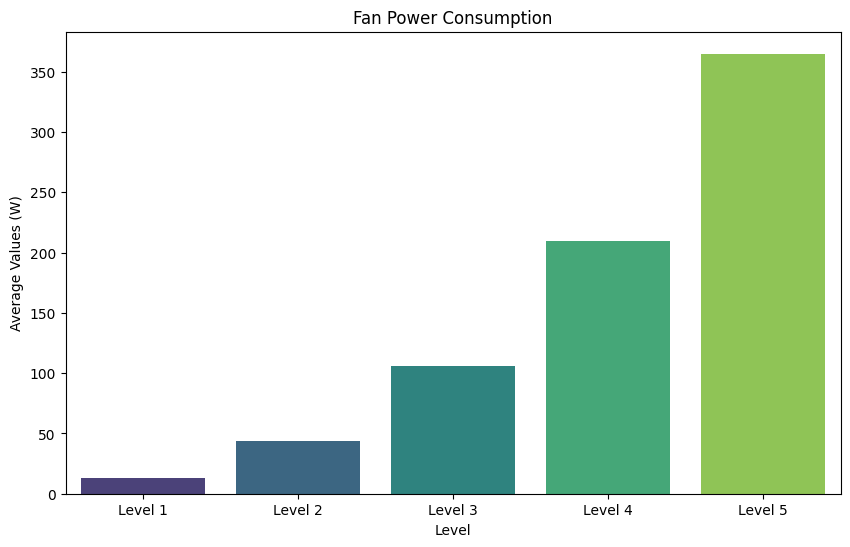

In [13]:
# Define the average values for each level
levels = [13, 44, 106, 210, 365]
labels = ['Level 1', 'Level 2', 'Level 3', 'Level 4', 'Level 5']

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=levels, palette="viridis")

# Display the plot
plt.title('Fan Power Consumption')
plt.xlabel('Level')
plt.ylabel('Average Values (W)')
plt.show()

In [ ]:
DF_FanSpeedPower

# 1. Month

In [33]:
#DF_FanSpeedPower['power']
DF_FanSpeedPower['time'] = pd.to_datetime(DF_FanSpeedPower['time'])

mask = DF_FanSpeedPower['time'].dt.strftime('%Y-%m').str.startswith('2022-08')

filtered_df = DF_FanSpeedPower[mask]

print(filtered_df)


                 name                      time        id         name.1  \
14293   FanSpeedPower 2022-08-01 01:51:52+00:00  6BE6E2E0  AirMaster2000   
14294   FanSpeedPower 2022-08-01 01:51:57+00:00  6BE6E2E0  AirMaster2000   
14295   FanSpeedPower 2022-08-01 01:52:03+00:00  6BE6E2E0  AirMaster2000   
14296   FanSpeedPower 2022-08-01 01:52:18+00:00  6BE6E2E0  AirMaster2000   
14297   FanSpeedPower 2022-08-01 01:52:24+00:00  6BE6E2E0  AirMaster2000   
...               ...                       ...       ...            ...   
230733  FanSpeedPower 2022-08-31 23:59:22+00:00  6BE6E2E0  AirMaster2000   
230734  FanSpeedPower 2022-08-31 23:59:38+00:00  6BE6E2E0  AirMaster2000   
230735  FanSpeedPower 2022-08-31 23:59:43+00:00  6BE6E2E0  AirMaster2000   
230736  FanSpeedPower 2022-08-31 23:59:48+00:00  6BE6E2E0  AirMaster2000   
230737  FanSpeedPower 2022-08-31 23:59:53+00:00  6BE6E2E0  AirMaster2000   

        power  speed_act  speed_set  
14293       0          0         10  
14294      

In [35]:
filtered_df2 = filtered_df[(filtered_df['speed_act'] == filtered_df['speed_set'])]


In [97]:
filtered_df2 = filtered_df2[(filtered_df2['name.1'] == 'AirMaster2000') | (filtered_df2['name.1'] == 'M88')]

# Display or use the filtered DataFrame 'filtered_df_filtered'
print(filtered_df2)

                 name                      time        id         name.1  \
14295   FanSpeedPower 2022-08-01 01:52:03+00:00  6BE6E2E0  AirMaster2000   
14296   FanSpeedPower 2022-08-01 01:52:18+00:00  6BE6E2E0  AirMaster2000   
14297   FanSpeedPower 2022-08-01 01:52:24+00:00  6BE6E2E0  AirMaster2000   
14298   FanSpeedPower 2022-08-01 01:52:29+00:00  6BE6E2E0  AirMaster2000   
14299   FanSpeedPower 2022-08-01 01:52:39+00:00  6BE6E2E0  AirMaster2000   
...               ...                       ...       ...            ...   
230733  FanSpeedPower 2022-08-31 23:59:22+00:00  6BE6E2E0  AirMaster2000   
230734  FanSpeedPower 2022-08-31 23:59:38+00:00  6BE6E2E0  AirMaster2000   
230735  FanSpeedPower 2022-08-31 23:59:43+00:00  6BE6E2E0  AirMaster2000   
230736  FanSpeedPower 2022-08-31 23:59:48+00:00  6BE6E2E0  AirMaster2000   
230737  FanSpeedPower 2022-08-31 23:59:53+00:00  6BE6E2E0  AirMaster2000   

        power  speed_act  speed_set  
14295      12        616        616  
14296      

In [109]:
filtered_df2.to_csv('filtered_data.csv', index=False)

In [99]:
unique_values = set(filtered_df2['speed_act'])

print(unique_values)

{0, 2054, 616, 975, 1335, 1695}


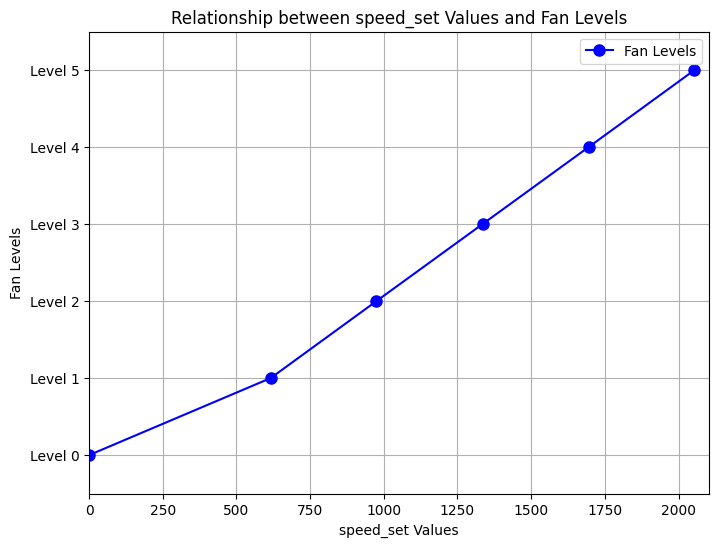

In [30]:
import matplotlib.pyplot as plt

# Mapping 'speed_set' values to their respective fan levels
speed_set_values = [0, 616, 975, 1335, 1695, 2054]
fan_levels = ['Level 0', 'Level 1', 'Level 2', 'Level 3', 'Level 4', 'Level 5']

# Plotting the relationship between 'speed_set' values and fan levels
plt.figure(figsize=(8, 6))

plt.plot(speed_set_values, fan_levels, marker='o', linestyle='-', color='blue', markersize=8, label='Fan Levels')

plt.xlabel('speed_set Values')
plt.ylabel('Fan Levels')
plt.title('Relationship between speed_set Values and Fan Levels')
plt.grid(True)
plt.legend()

# Customizing axis limits and ticks
plt.xlim(0, max(speed_set_values) + 50)  # Set x-axis limits starting from 0
plt.ylim(-0.5, len(fan_levels) - 0.5)   # Set y-axis limits

# Set y-axis ticks and labels
plt.yticks(range(len(fan_levels)), fan_levels)

plt.show()


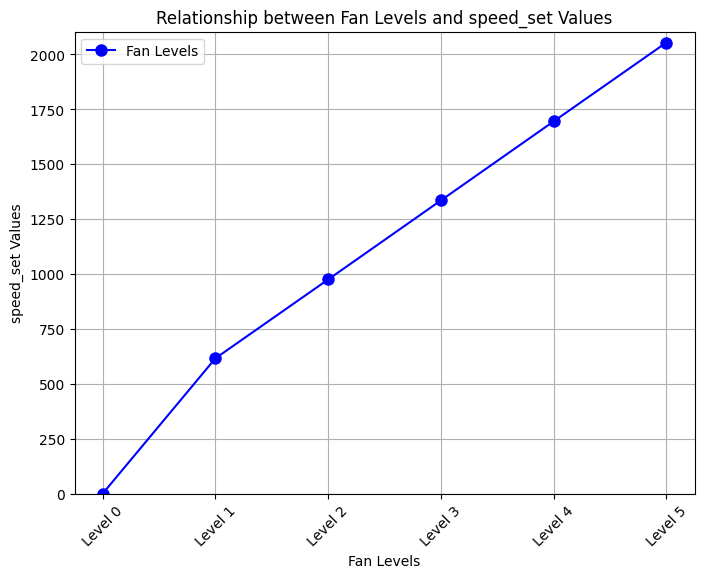

In [31]:
import matplotlib.pyplot as plt

# Mapping 'speed_set' values to their respective fan levels
speed_set_values = [0, 616, 975, 1335, 1695, 2054]
fan_levels = ['Level 0', 'Level 1', 'Level 2', 'Level 3', 'Level 4', 'Level 5']

# Plotting the relationship between 'speed_set' values and fan levels with switched axes
plt.figure(figsize=(8, 6))

plt.plot(fan_levels, speed_set_values, marker='o', linestyle='-', color='blue', markersize=8, label='Fan Levels')

plt.xlabel('Fan Levels')
plt.ylabel('speed_set Values')
plt.title('Relationship between Fan Levels and speed_set Values')
plt.grid(True)
plt.legend()

# Customizing axis limits and ticks
plt.ylim(0, max(speed_set_values) + 50)  # Set y-axis limits starting from 0
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

plt.show()


## DAY 1

In [100]:
# Filter 'speed_act' column in filtered_df2 where values are equal to 616
level1_day1 = []
level2_day1 = []
level3_day1 = []
level4_day1 = []
level5_day1 = []



for i, row in filtered_df2.iterrows():
    if row['speed_act'] == 616:
        level1_day1.append(row)
    elif row ['speed_act'] == 975:
        level2_day1.append(row)
    elif row ['speed_act'] == 1335:
        level3_day1.append(row)
    elif row ['speed_act'] == 1695:
        level4_day1.append(row)
    elif row ['speed_act'] == 2054:
        level5_day1.append(row)

In [104]:
count_data_points1_day1 = len(level1_day1)  
print("Number of data points level1_day1:", count_data_points1_day1)
count_data_points1_day2 = len(level2_day1)  
print("Number of data points level1_day2:", count_data_points1_day2)
count_data_points1_day3 = len(level3_day1)  
print("Number of data points level1_day3:", count_data_points1_day3)
count_data_points1_day4 = len(level4_day1)  
print("Number of data points level1_day4:", count_data_points1_day4)
count_data_points1_day5 = len(level5_day1)  
print("Number of data points level1_day5:", count_data_points1_day5)

Number of data points level1_day1: 174891
Number of data points level1_day2: 22803
Number of data points level1_day3: 11355
Number of data points level1_day4: 1804
Number of data points level1_day5: 114


In [105]:
#Level 1 Day 1
power_values = [row['power'] for row in level1_day1]
minimum_day1 = min(power_values)
print("Minimum data point level1_day1:", minimum_day1)
# Calculate the maximum value of 'power' column from level2_day1 dataframe.
power_values = [row['power'] for row in level1_day1]
maximum_day1 = max(power_values)
print("Maximum data point level1_day1:", maximum_day1)
# Calculate the average value of 'power' column from level2_day1 dataframe.
power_values = [row['power'] for row in level1_day1]
average_level1_day1 = sum(power_values) / len(power_values)
print("Average data point level1_day1:", average_level1_day1)

Minimum data point level1_day1: 4
Maximum data point level1_day1: 16
Average data point level1_day1: 9.3322984030053


In [110]:
# Filter rows where the 'power' column value is equal to the minimum value (4 in this case)
rows_with_minimum_power = filtered_df2[filtered_df2['power'] == 4]

# Display or use the rows with the minimum 'power' value
print(rows_with_minimum_power)

                 name                      time        id         name.1  \
34243   FanSpeedPower 2022-08-04 08:23:21+00:00  6BE6E2E0  AirMaster2000   
34401   FanSpeedPower 2022-08-04 08:42:42+00:00  6BE6E2E0  AirMaster2000   
35145   FanSpeedPower 2022-08-04 10:18:31+00:00  6BE6E2E0  AirMaster2000   
37203   FanSpeedPower 2022-08-04 14:29:12+00:00  6BE6E2E0  AirMaster2000   
37887   FanSpeedPower 2022-08-05 02:37:05+00:00  6BE6E2E0  AirMaster2000   
...               ...                       ...       ...            ...   
173604  FanSpeedPower 2022-08-26 15:06:42+00:00  6BE6E2E0  AirMaster2000   
174900  FanSpeedPower 2022-08-26 18:50:20+00:00  6BE6E2E0  AirMaster2000   
175743  FanSpeedPower 2022-08-26 20:53:16+00:00  6BE6E2E0  AirMaster2000   
176592  FanSpeedPower 2022-08-26 22:44:42+00:00  6BE6E2E0  AirMaster2000   
177259  FanSpeedPower 2022-08-27 00:17:24+00:00  6BE6E2E0  AirMaster2000   

        power  speed_act  speed_set  
34243       4        616        616  
34401      

In [77]:
#Level 2 Day 1
power_values = [row['power'] for row in level2_day1]
minimum_level2_day1 = min(power_values)
print("Minimum data point level2_day1:", minimum_level2_day1)
# Calculate the maximum value of 'power' column from level2_day1 dataframe.
power_values = [row['power'] for row in level2_day1]
maximum_level2_day1 = max(power_values)
print("Maximum data point level2_day1:", maximum_level2_day1)
# Calculate the average value of 'power' column from level2_day1 dataframe.
power_values = [row['power'] for row in level2_day1]
average_level2_day1 = sum(power_values) / len(power_values)
print("Average data point level2_day1:", average_level2_day1)


Minimum data point level2_day1: 22
Maximum data point level2_day1: 44
Average data point level2_day1: 28.470113581546286


In [78]:
#Level 3 Day 1
power_values = [row['power'] for row in level3_day1]
minimum_level3_day1 = min(power_values)
print("Minimum data point level3_day1:", minimum_level3_day1)
# Calculate the maximum value of 'power' column from level3_day1 dataframe.
power_values = [row['power'] for row in level3_day1]
maximum_level3_day1 = max(power_values)
print("Maximum data point level3_day1:", maximum_level3_day1)
# Calculate the average value of 'power' column from level3_day1 dataframe.
power_values = [row['power'] for row in level3_day1]
average_level3_day1 = sum(power_values) / len(power_values)
print("Average data point level3_day1:", average_level3_day1)


Minimum data point level3_day1: 63
Maximum data point level3_day1: 106
Average data point level3_day1: 72.11387054161162


In [79]:
#Level 4 Day 1
power_values = [row['power'] for row in level4_day1]
minimum_level4_day1 = min(power_values)
print("Minimum data point level4_day1:", minimum_level4_day1)
# Calculate the maximum value of 'power' column from level4_day1 dataframe.
power_values = [row['power'] for row in level4_day1]
maximum_level4_day1 = max(power_values)
print("Maximum data point level4_day1:", maximum_level4_day1)
# Calculate the average value of 'power' column from level4_day1 dataframe.
power_values = [row['power'] for row in level4_day1]
average_level4_day1 = sum(power_values) / len(power_values)
print("Average data point level4_day1:", average_level4_day1)

Minimum data point level4_day1: 110
Maximum data point level4_day1: 208
Average data point level4_day1: 149.62749445676275


In [80]:
#Level 5 Day 1
power_values = [row['power'] for row in level5_day1]
minimum_level5_day1 = min(power_values)
print("Minimum data point level5_day1:", minimum_level5_day1)
# Calculate the maximum value of 'power' column from level5_day1 dataframe.
power_values = [row['power'] for row in level5_day1]
maximum_level5_day1 = max(power_values)
print("Maximum data point level5_day1:", maximum_level5_day1)
# Calculate the average value of 'power' column from level4_day1 dataframe.
power_values = [row['power'] for row in level5_day1]
average_level5_day1 = sum(power_values) / len(power_values)
print("Average data point level5_day1:", average_level5_day1)

Minimum data point level5_day1: 222
Maximum data point level5_day1: 366
Average data point level5_day1: 242.25438596491227


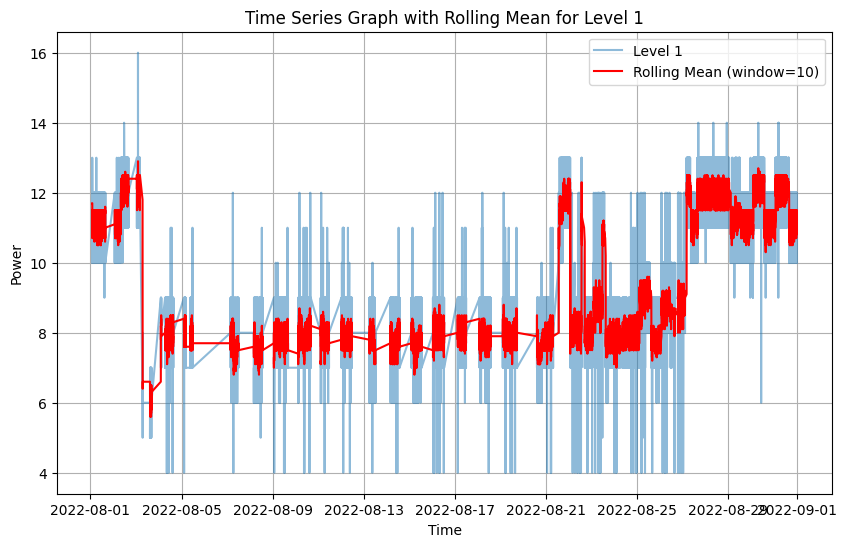

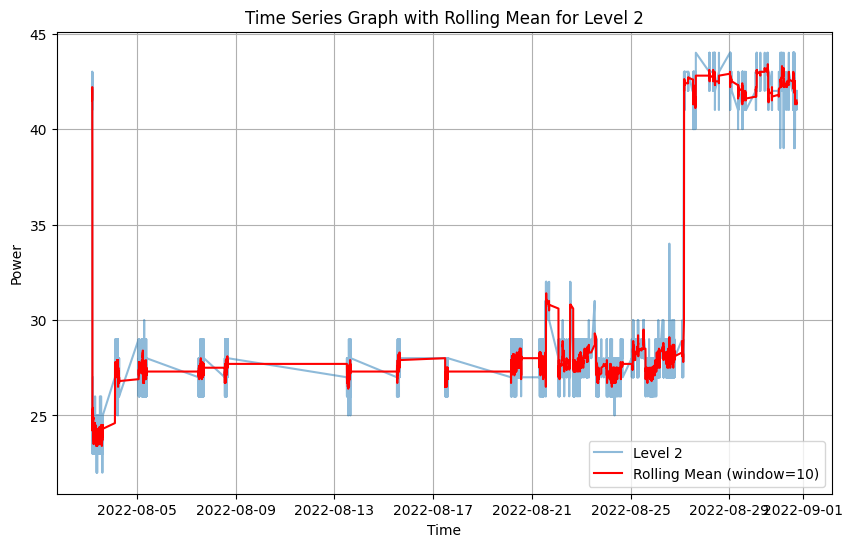

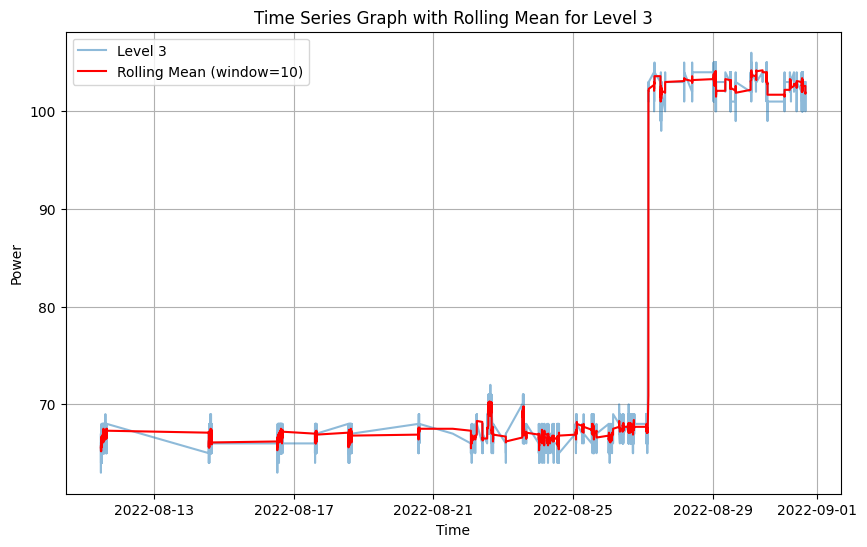

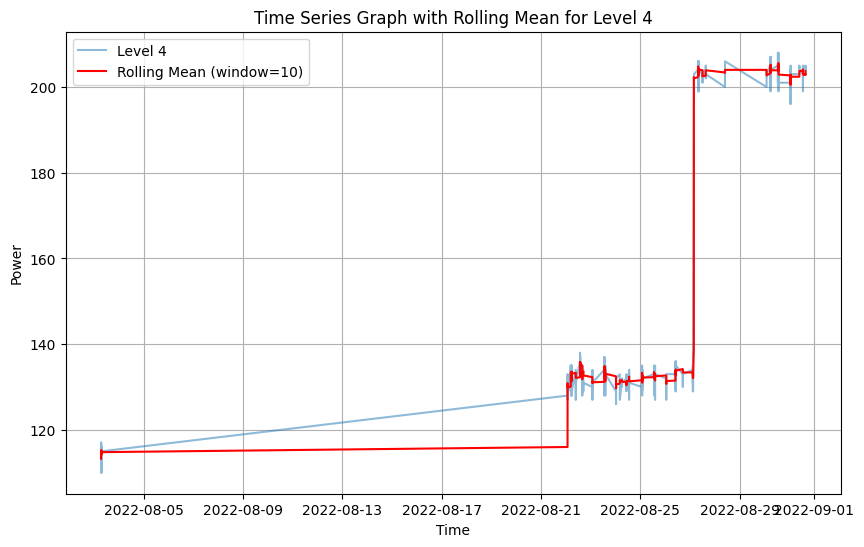

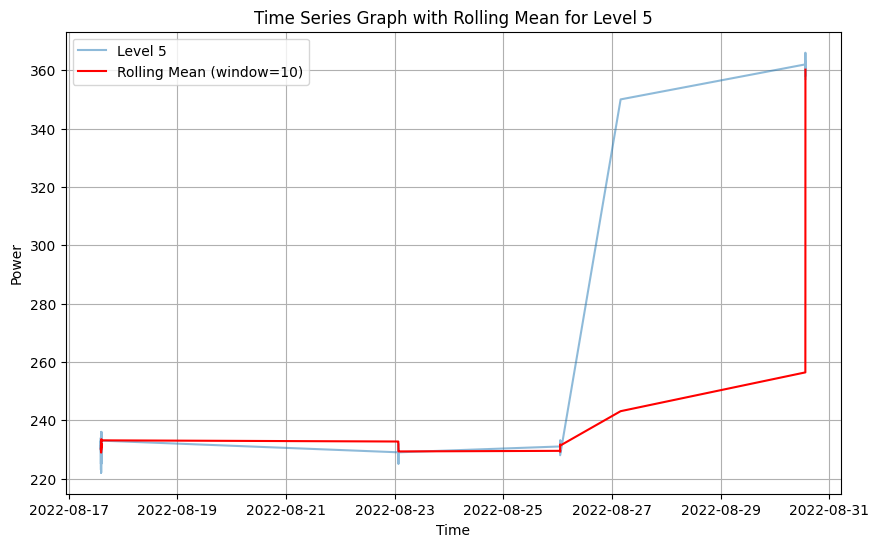

In [96]:
# Plotting time series graphs for each level in level[i]_day1
for i, level_df in enumerate([level1_day1, level2_day1, level3_day1,level4_day1,level5_day1]):  # Replace with your level DataFrames
    # Extracting the 'time' and 'power' columns for plotting
    time_values = [pd.to_datetime(row['time']) for row in level_df]
    power_values = [row['power'] for row in level_df]

    rolling_mean_power = pd.Series(power_values).rolling(window=10).mean()  # Adjust window size as needed

    # Plotting the time series graph for the current level
    plt.figure(figsize=(10, 6))
    plt.plot(time_values, power_values, label=f'Level {i+1}', alpha=0.5)  # Original data
    plt.plot(time_values, rolling_mean_power, label=f'Rolling Mean (window=10)', color='red')  # Rolling mean data
    plt.xlabel('Time')
    plt.ylabel('Power')
    plt.title(f'Time Series Graph with Rolling Mean for Level {i+1}')
    plt.legend()
    plt.grid(True)
    plt.show()

# 2. Month

In [85]:
#DF_FanSpeedPower['power']
DF_FanSpeedPower['time'] = pd.to_datetime(DF_FanSpeedPower['time'])

mask = DF_FanSpeedPower['time'].dt.strftime('%Y-%m').str.startswith('2022-09')

filtered_df_month2 = DF_FanSpeedPower[mask]

In [86]:
filtered_df2_month2 = filtered_df_month2[(filtered_df_month2['speed_act'] == filtered_df_month2['speed_set'])]


## Day 2

In [87]:
# Filter 'speed_act' column in filtered_df2 where values are equal to 616
level1_day2 = []
level2_day2 = []
level3_day2 = []
level4_day2 = []
level5_day2 = []



for i, row in filtered_df2_month2.iterrows():
    if row['speed_act'] == 616:
        level1_day2.append(row)
    elif row ['speed_act'] == 975:
        level2_day2.append(row)
    elif row ['speed_act'] == 1335:
        level3_day2.append(row)
    elif row ['speed_act'] == 1695:
        level4_day2.append(row)
    elif row ['speed_act'] == 2054:
        level5_day2.append(row)

In [108]:
# Filter rows where the 'power' column value is equal to the minimum value (4 in this case)
rows_with_minimum_power = filtered_df2_month2[filtered_df2_month2['power'] == 4]

# Display or use the rows with the minimum 'power' value
print(rows_with_minimum_power)

Empty DataFrame
Columns: [name, time, id, name.1, power, speed_act, speed_set]
Index: []


In [88]:
count_data_points1_day2 = len(level1_day2)  
print("Number of data points level1_day1:", count_data_points1_day2)
count_data_points2_day2 = len(level2_day2)  
print("Number of data points level2_day2:", count_data_points2_day2)
count_data_points3_day2 = len(level3_day2)  
print("Number of data points level3_day2:", count_data_points3_day2)
count_data_points4_day2 = len(level4_day2)  
print("Number of data points level4_day2:", count_data_points4_day2)
count_data_points5_day2 = len(level5_day2)  
print("Number of data points level5_day2:", count_data_points5_day2)

Number of data points level1_day1: 258358
Number of data points level2_day2: 11292
Number of data points level3_day2: 7571
Number of data points level4_day2: 1115
Number of data points level5_day2: 72


In [93]:
## Month = day ##
#Level 1 day 2
power_values = [row['power'] for row in level1_day2]
minimum_day2 = min(power_values)
print("Minimum data point level1_day2:", minimum_day2)
power_values = [row['power'] for row in level1_day2]
maximum_day2 = max(power_values)
print("Maximum data point level1_day2:", maximum_day2)
power_values = [row['power'] for row in level1_day2]
average_level1_day2 = sum(power_values) / len(power_values)
print("Average data point level1_day2:", average_level1_day2)

#Level 2 Day 2
power_values = [row['power'] for row in level2_day2]
minimum_level2_day2 = min(power_values)
print("Minimum data point level2_day2:", minimum_level2_day2)
power_values = [row['power'] for row in level2_day2]
maximum_level2_day2 = max(power_values)
print("Maximum data point level2_day2:", maximum_level2_day2)
power_values = [row['power'] for row in level2_day2]
average_level2_day2 = sum(power_values) / len(power_values)
print("Average data point level2_day2:", average_level2_day2)

#Level 3 Day 2
power_values = [row['power'] for row in level3_day2]
minimum_level3_day2 = min(power_values)
print("Minimum data point level3_day2:", minimum_level3_day2)
power_values = [row['power'] for row in level3_day2]
maximum_level3_day2 = max(power_values)
print("Maximum data point level3_day2:", maximum_level3_day2)
power_values = [row['power'] for row in level3_day2]
average_level3_day2 = sum(power_values) / len(power_values)
print("Average data point level3_day2:", average_level3_day2)

#Level 4 Day 2
power_values = [row['power'] for row in level4_day2]
minimum_level4_day2 = min(power_values)
print("Minimum data point level4_day2:", minimum_level4_day2)
power_values = [row['power'] for row in level4_day2]
maximum_level4_day2 = max(power_values)
print("Maximum data point level4_day2:", maximum_level4_day2)
power_values = [row['power'] for row in level4_day2]
average_level4_day2 = sum(power_values) / len(power_values)
print("Average data point level4_day2:", average_level4_day2)

#Level 5 Day 2
power_values = [row['power'] for row in level5_day2]
minimum_level5_day2 = min(power_values)
print("Minimum data point level5_day2:", minimum_level5_day2)
power_values = [row['power'] for row in level5_day2]
maximum_level5_day2 = max(power_values)
print("Maximum data point level5_day2:", maximum_level5_day2)
power_values = [row['power'] for row in level5_day2]
average_level5_day2 = sum(power_values) / len(power_values)
print("Average data point level5_day2:", average_level5_day2)

Minimum data point level1_day2: 8
Maximum data point level1_day2: 17
Average data point level1_day2: 11.406629560532284
Minimum data point level2_day2: 39
Maximum data point level2_day2: 49
Average data point level2_day2: 42.39311016648955
Minimum data point level3_day2: 97
Maximum data point level3_day2: 107
Average data point level3_day2: 102.46770571919166
Minimum data point level4_day2: 196
Maximum data point level4_day2: 208
Average data point level4_day2: 202.7560538116592
Minimum data point level5_day2: 347
Maximum data point level5_day2: 365
Average data point level5_day2: 358.6666666666667


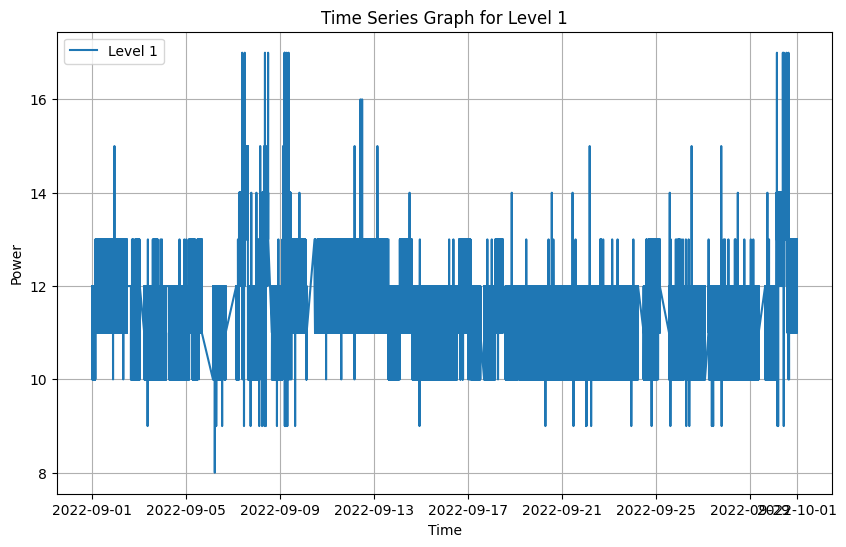

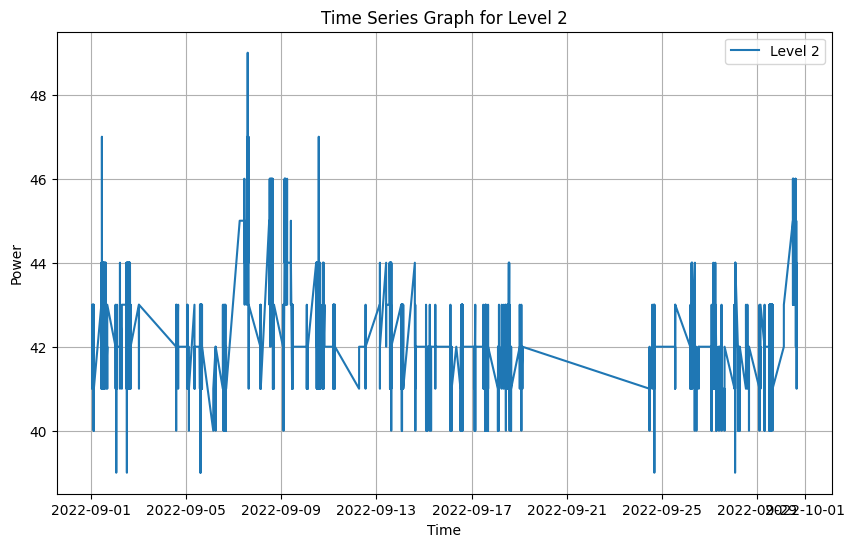

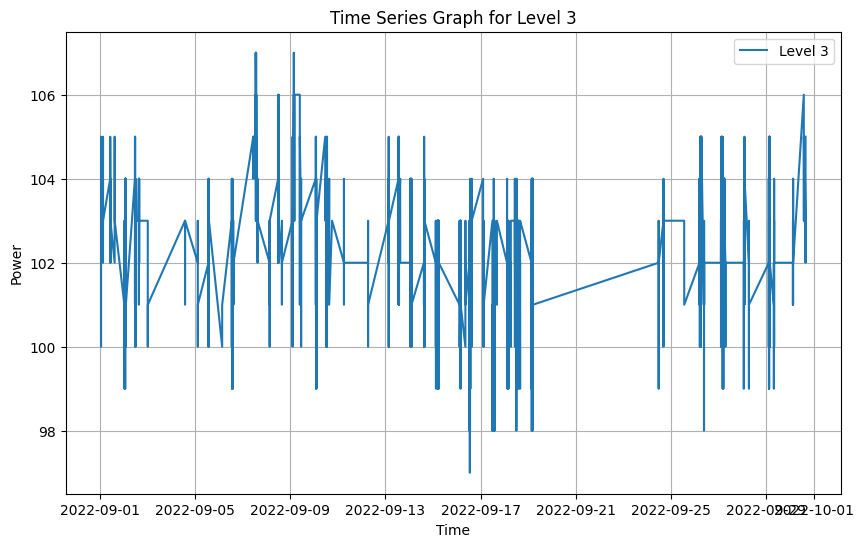

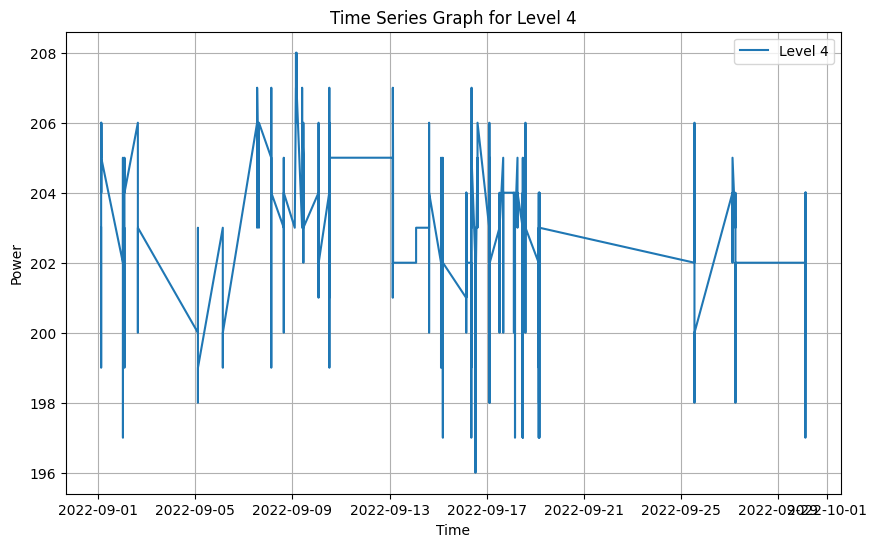

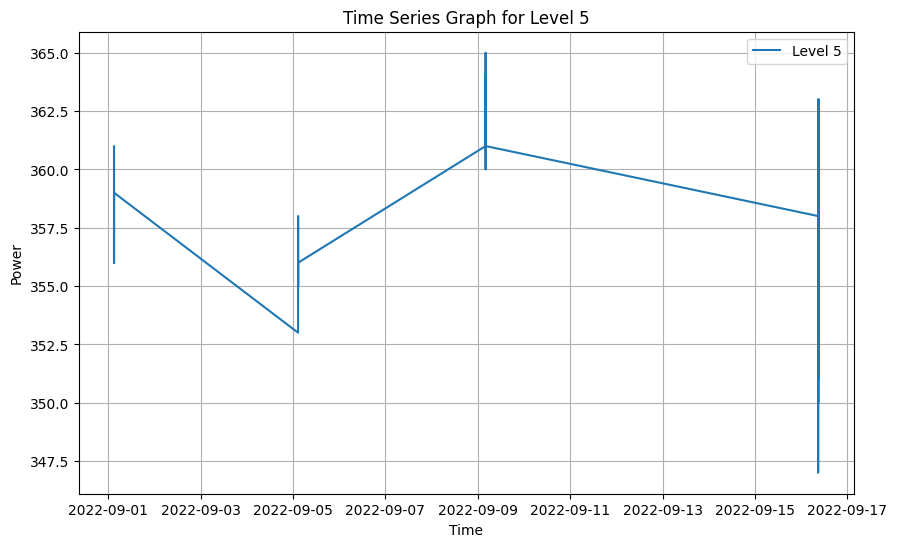

In [94]:
# Plotting time series graphs for each level in level[i]_day2
for i, level_df in enumerate([level1_day2, level2_day2, level3_day2,level4_day2,level5_day2]):
    # Extracting the 'time' and 'power' columns for plotting
    time_values = [pd.to_datetime(row['time']) for row in level_df]
    power_values = [row['power'] for row in level_df]

    # Plotting the time series graph for the current level
    plt.figure(figsize=(10, 6))
    plt.plot(time_values, power_values, label=f'Level {i+1}')
    plt.xlabel('Time')
    plt.ylabel('Power')
    plt.title(f'Time Series Graph for Level {i+1}')
    plt.legend()
    plt.grid(True)
    plt.show()

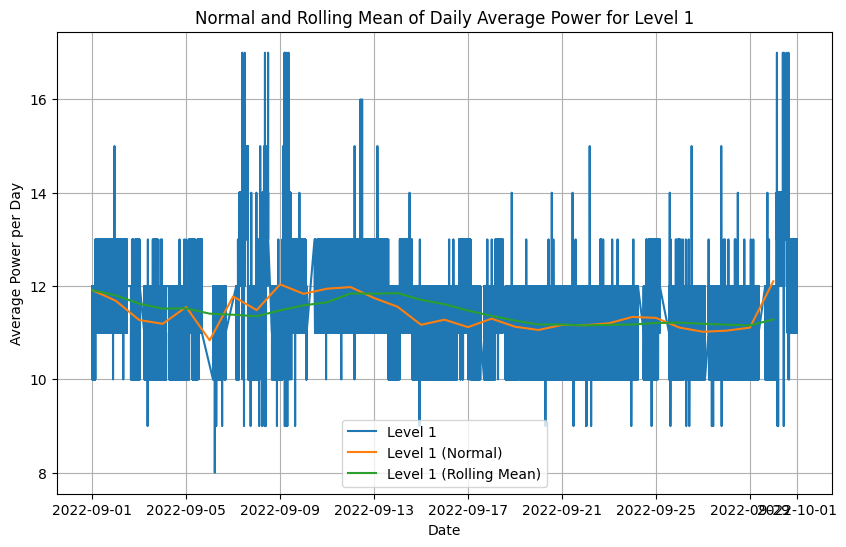

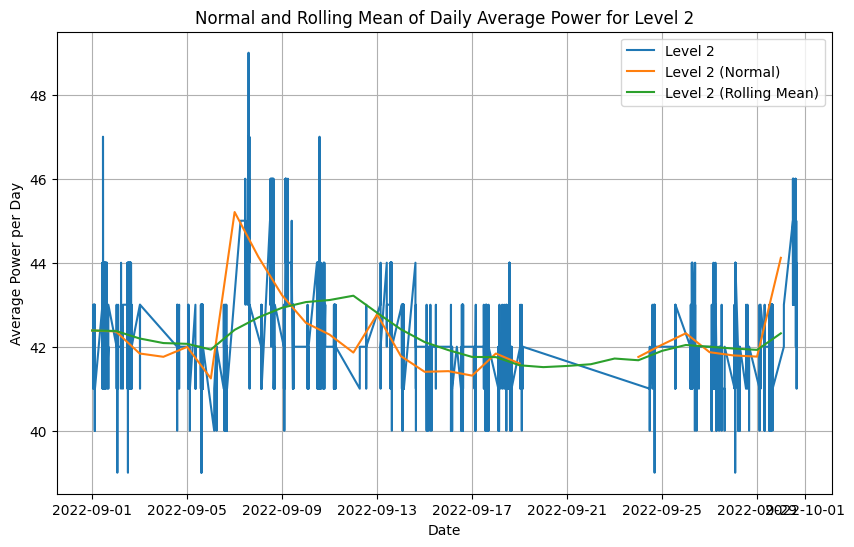

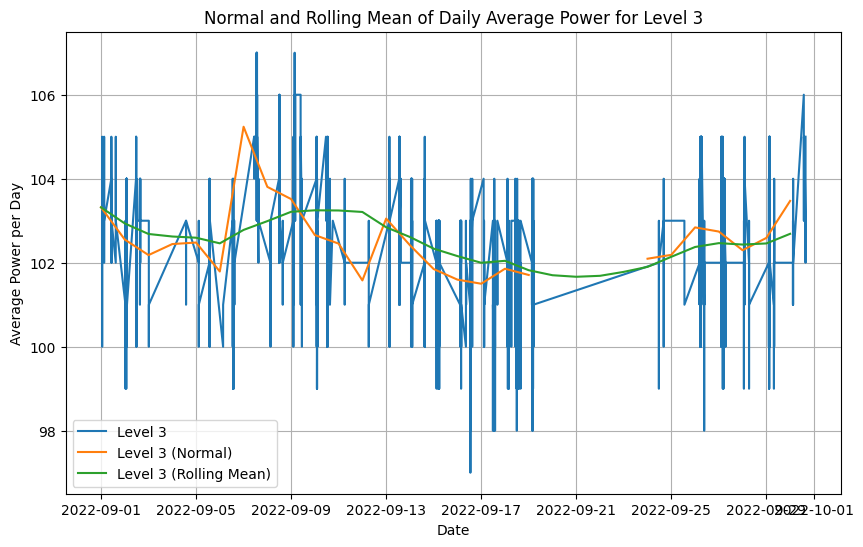

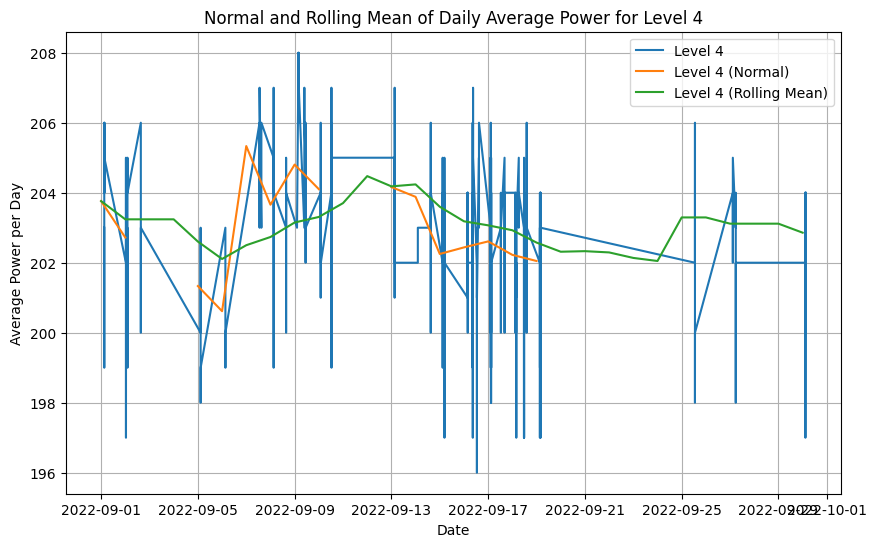

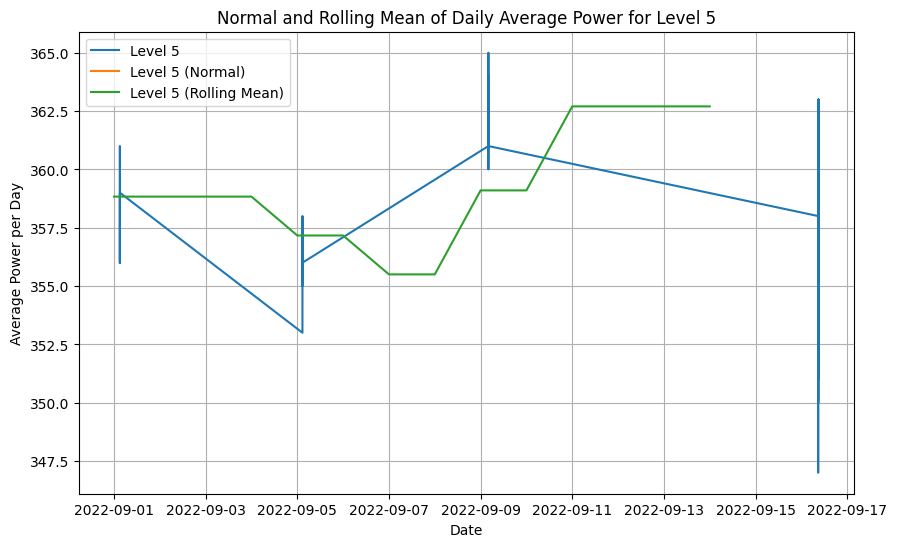

In [133]:
import pandas as pd
import matplotlib.pyplot as plt

level_day2_list = [level1_day2, level2_day2, level3_day2, level4_day2, level5_day2]

for i, level_df in enumerate(level_day2_list):
    level_df_concat = pd.concat(level_df, axis=1).T

    level_df_concat['time'] = pd.to_datetime(level_df_concat['time'])

    level_df_concat.set_index('time', inplace=True)

    daily_avg_power = level_df_concat['power'].resample('D').mean()

    # Calculate rolling mean of daily average power values
    rolling_mean_daily_avg_power = daily_avg_power.rolling(window=6, min_periods=1).mean()
    time_values = [pd.to_datetime(row['time']) for row in level_df]
    power_values = [row['power'] for row in level_df]
    # Plotting the time series graph for each level
    plt.figure(figsize=(10, 6))
    plt.plot(time_values, power_values, label=f'Level {i+1}')
    plt.plot(daily_avg_power.index, daily_avg_power, label=f'Level {i+1} (Normal)')
    plt.plot(rolling_mean_daily_avg_power.index, rolling_mean_daily_avg_power, label=f'Level {i+1} (Rolling Mean)')
    plt.xlabel('Date')
    plt.ylabel('Average Power per Day')
    plt.title(f'Normal and Rolling Mean of Daily Average Power for Level {i+1}')
    plt.legend()
    plt.grid(True)
    plt.show()


## All Months

In [3]:
#DF_FanSpeedPower['power']
DF_FanSpeedPower['time'] = pd.to_datetime(DF_FanSpeedPower['time'])


In [4]:
DF_FanSpeedPower

,name,time,id,name.1,power,speed_act,speed_set
0,FanSpeedPower,2022-07-29 04:01:41+00:00,6BE6E2E0,AirMaster2000,0,0,10
1,FanSpeedPower,2022-07-29 04:01:46+00:00,6BE6E2E0,AirMaster2000,14,600,616
2,FanSpeedPower,2022-07-29 04:01:52+00:00,6BE6E2E0,AirMaster2000,38,704,847
3,FanSpeedPower,2022-07-29 04:01:57+00:00,6BE6E2E0,AirMaster2000,44,974,975
4,FanSpeedPower,2022-07-29 04:02:02+00:00,6BE6E2E0,AirMaster2000,44,975,975
...,...,...,...,...,...,...,...
3174950,FanSpeedPower,2023-09-02 08:47:05+00:00,1F988330,P88,46,975,975
3174951,FanSpeedPower,2023-09-02 08:47:07+00:00,6BE6E2E0,M88,12,616,616
3174952,FanSpeedPower,2023-09-02 08:47:10+00:00,1F988330,P88,47,975,975
3174953,FanSpeedPower,2023-09-02 08:47:12+00:00,6BE6E2E0,M88,10,616,616


FAN SPEED POWER

In [18]:

DF_FanSpeedPower['time'] = pd.to_datetime(DF_FanSpeedPower['time'])

mask = DF_FanSpeedPower['time'].dt.strftime('%Y-%m').str.startswith('2022-08')

filtered_df = DF_FanSpeedPower[mask]

# Inverting the mask to keep rows that do not start with '2022-08'
inverse_mask = ~mask

# Filtering the DataFrame to remove rows from '2022-08'
filtered_df_without_august = DF_FanSpeedPower[inverse_mask]

mask_2 = DF_FanSpeedPower['time'].dt.strftime('%Y-%m').str.startswith('2022-07')
inverse_mask2 = ~mask_2
filtered_df_without_august = filtered_df_without_august[inverse_mask2]



C:\Users\Mathi\AppData\Local\Temp\ipykernel_11828\2911394256.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df_without_august = filtered_df_without_august[inverse_mask2]


In [19]:
filtered_df_full = filtered_df_without_august[(filtered_df_without_august['speed_act'] == filtered_df_without_august['speed_set'])]

In [20]:
filtered_df_full = filtered_df_full[(filtered_df_full['name.1'] == 'AirMaster2000') | (filtered_df_full['name.1'] == 'M88')]

# Display or use the filtered DataFrame 'filtered_df_filtered'
print(filtered_df_full)

                  name                      time        id         name.1  \
230738   FanSpeedPower 2022-09-01 00:00:04+00:00  6BE6E2E0  AirMaster2000   
230739   FanSpeedPower 2022-09-01 00:00:09+00:00  6BE6E2E0  AirMaster2000   
230740   FanSpeedPower 2022-09-01 00:00:25+00:00  6BE6E2E0  AirMaster2000   
230741   FanSpeedPower 2022-09-01 00:00:30+00:00  6BE6E2E0  AirMaster2000   
230742   FanSpeedPower 2022-09-01 00:00:35+00:00  6BE6E2E0  AirMaster2000   
...                ...                       ...       ...            ...   
3174947  FanSpeedPower 2023-09-02 08:46:51+00:00  6BE6E2E0            M88   
3174949  FanSpeedPower 2023-09-02 08:47:02+00:00  6BE6E2E0            M88   
3174951  FanSpeedPower 2023-09-02 08:47:07+00:00  6BE6E2E0            M88   
3174953  FanSpeedPower 2023-09-02 08:47:12+00:00  6BE6E2E0            M88   
3174954  FanSpeedPower 2023-09-02 08:47:17+00:00  6BE6E2E0            M88   

         power  speed_act  speed_set  
230738      12        616        616

In [21]:
# Filter 'speed_act' column in filtered_df2 where values are equal to 616
level1_full = []
level2_full = []
level3_full = []
level4_full = []
level5_full = []



for i, row in filtered_df_full.iterrows():
    if row['speed_act'] == 616:
        level1_full.append(row)
    elif row ['speed_act'] == 975:
        level2_full.append(row)
    elif row ['speed_act'] == 1335:
        level3_full.append(row)
    elif row ['speed_act'] == 1695:
        level4_full.append(row)
    elif row ['speed_act'] == 2054:
        level5_full.append(row)

In [22]:
count_data_points1_day2 = len(level1_full)  
print("Number of data points level1_day1:", count_data_points1_day2)
count_data_points2_day2 = len(level2_full)  
print("Number of data points level2_day2:", count_data_points2_day2)
count_data_points3_day2 = len(level3_full)  
print("Number of data points level3_day2:", count_data_points3_day2)
count_data_points4_day2 = len(level4_full)  
print("Number of data points level4_day2:", count_data_points4_day2)
count_data_points5_day2 = len(level5_full)  
print("Number of data points level5_day2:", count_data_points5_day2)

Number of data points level1_day1: 2510983
Number of data points level2_day2: 59266
Number of data points level3_day2: 31482
Number of data points level4_day2: 2631
Number of data points level5_day2: 496


In [23]:
## Month = day ##
#Level 1 day 2
power_values = [row['power'] for row in level1_full]
minimum_day2 = min(power_values)
print("Minimum data point level1_day2:", minimum_day2)
power_values = [row['power'] for row in level1_full]
maximum_day2 = max(power_values)
print("Maximum data point level1_day2:", maximum_day2)
power_values = [row['power'] for row in level1_full]
average_level1_day2 = sum(power_values) / len(power_values)
print("Average data point level1_day2:", average_level1_day2)

#Level 2 Day 2
power_values = [row['power'] for row in level2_full]
minimum_level2_day2 = min(power_values)
print("Minimum data point level2_day2:", minimum_level2_day2)
power_values = [row['power'] for row in level2_full]
maximum_level2_day2 = max(power_values)
print("Maximum data point level2_day2:", maximum_level2_day2)
power_values = [row['power'] for row in level2_full]
average_level2_day2 = sum(power_values) / len(power_values)
print("Average data point level2_day2:", average_level2_day2)

#Level 3 Day 2
power_values = [row['power'] for row in level3_full]
minimum_level3_day2 = min(power_values)
print("Minimum data point level3_day2:", minimum_level3_day2)
power_values = [row['power'] for row in level3_full]
maximum_level3_day2 = max(power_values)
print("Maximum data point level3_day2:", maximum_level3_day2)
power_values = [row['power'] for row in level3_full]
average_level3_day2 = sum(power_values) / len(power_values)
print("Average data point level3_day2:", average_level3_day2)

#Level 4 Day 2
power_values = [row['power'] for row in level4_full]
minimum_level4_day2 = min(power_values)
print("Minimum data point level4_day2:", minimum_level4_day2)
power_values = [row['power'] for row in level4_full]
maximum_level4_day2 = max(power_values)
print("Maximum data point level4_day2:", maximum_level4_day2)
power_values = [row['power'] for row in level4_full]
average_level4_day2 = sum(power_values) / len(power_values)
print("Average data point level4_day2:", average_level4_day2)

#Level 5 Day 2
power_values = [row['power'] for row in level5_full]
minimum_level5_day2 = min(power_values)
print("Minimum data point level5_day2:", minimum_level5_day2)
power_values = [row['power'] for row in level5_full]
maximum_level5_day2 = max(power_values)
print("Maximum data point level5_day2:", maximum_level5_day2)
power_values = [row['power'] for row in level5_full]
average_level5_day2 = sum(power_values) / len(power_values)
print("Average data point level5_day2:", average_level5_day2)

Minimum data point level1_day2: 3
Maximum data point level1_day2: 18
Average data point level1_day2: 11.760106300998453
Minimum data point level2_day2: 35
Maximum data point level2_day2: 50
Average data point level2_day2: 40.35038639354774
Minimum data point level3_day2: 88
Maximum data point level3_day2: 107
Average data point level3_day2: 97.30010799822121
Minimum data point level4_day2: 180
Maximum data point level4_day2: 208
Average data point level4_day2: 199.9247434435576
Minimum data point level5_day2: 325
Maximum data point level5_day2: 369
Average data point level5_day2: 356.10483870967744


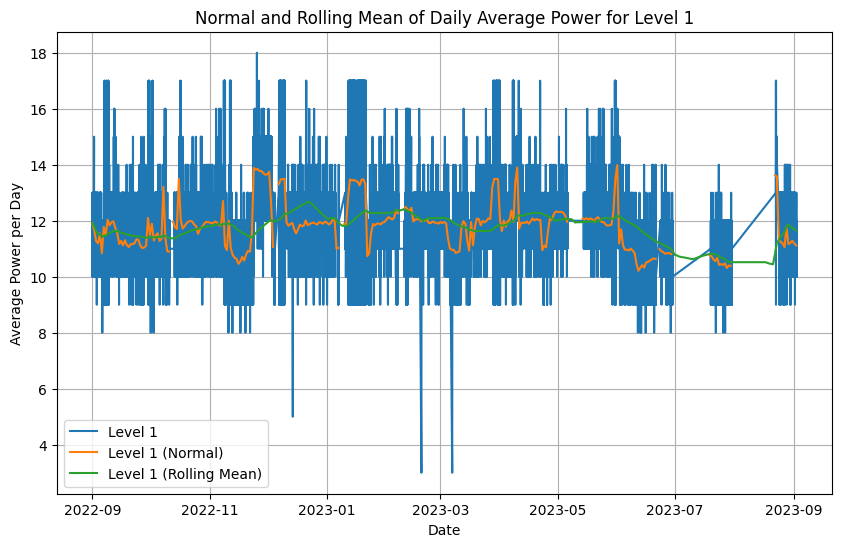

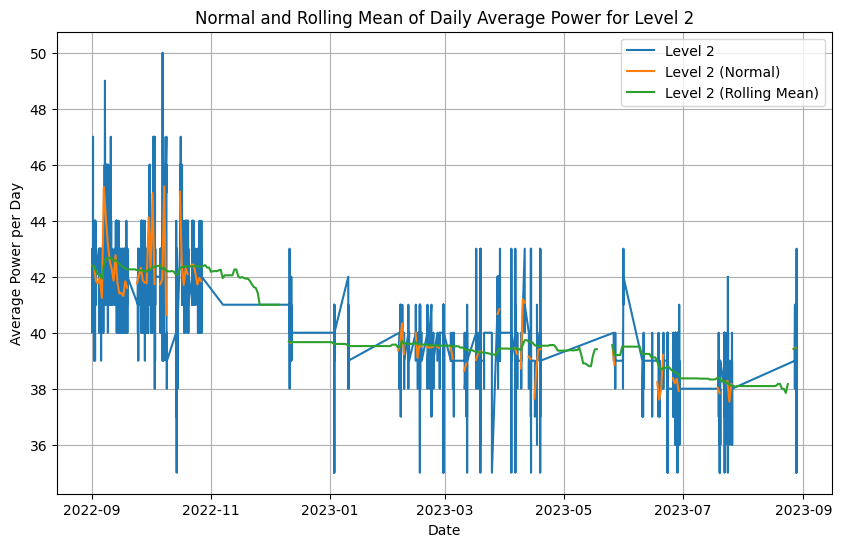

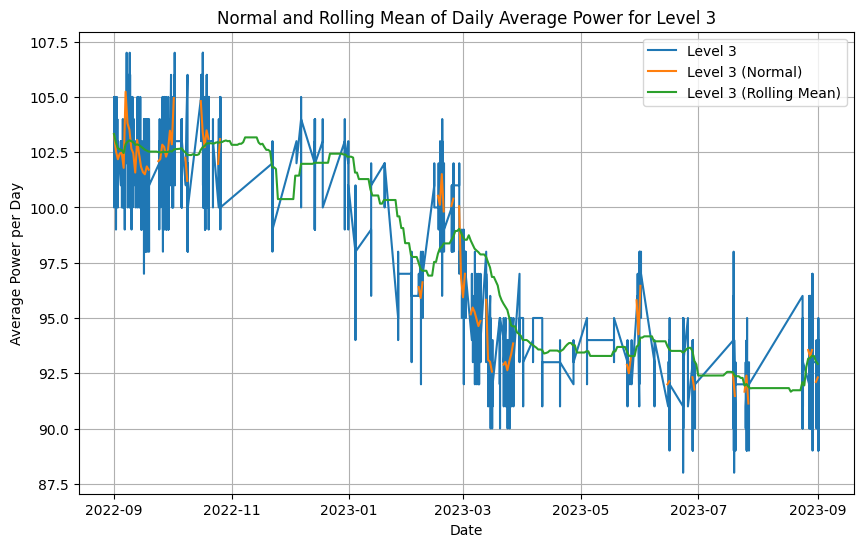

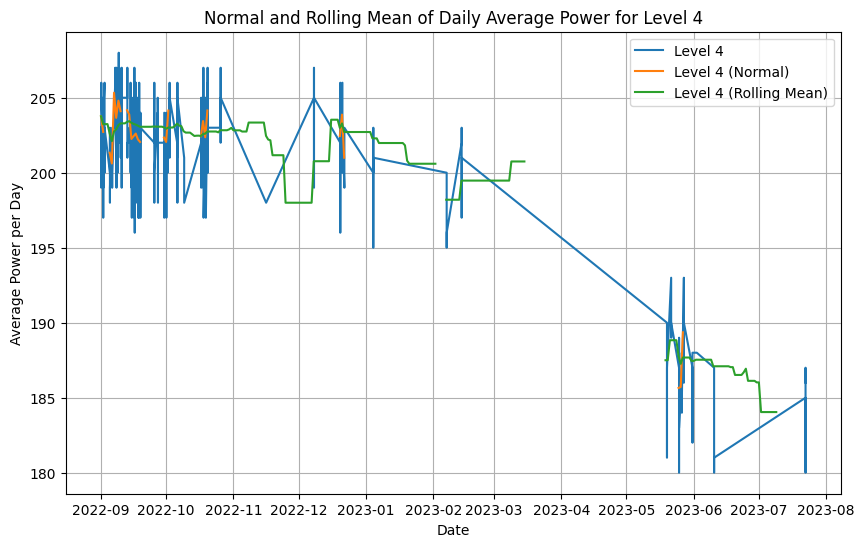

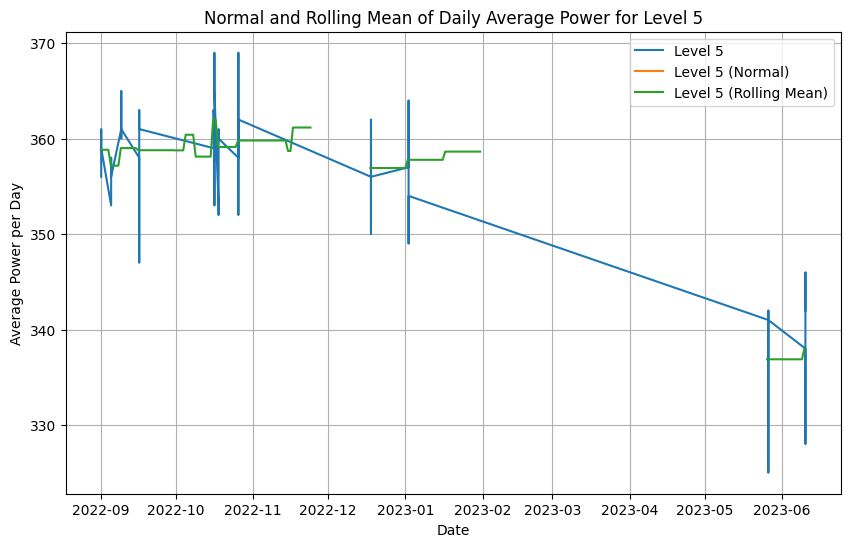

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

level_day2_list = [level1_full, level2_full, level3_full, level4_full, level5_full]

for i, level_df in enumerate(level_day2_list):
    level_df_concat = pd.concat(level_df, axis=1).T

    level_df_concat['time'] = pd.to_datetime(level_df_concat['time'])

    level_df_concat.set_index('time', inplace=True)

    daily_avg_power = level_df_concat['power'].resample('D').mean()

    # Calculate rolling mean of daily average power values
    rolling_mean_daily_avg_power = daily_avg_power.rolling(window=30, min_periods=1).mean()
    time_values = [pd.to_datetime(row['time']) for row in level_df]
    power_values = [row['power'] for row in level_df]
    # Plotting the time series graph for each level
    plt.figure(figsize=(10, 6))
    plt.plot(time_values, power_values, label=f'Level {i+1}')
    plt.plot(daily_avg_power.index, daily_avg_power, label=f'Level {i+1} (Normal)')
    plt.plot(rolling_mean_daily_avg_power.index, rolling_mean_daily_avg_power, label=f'Level {i+1} (Rolling Mean)')
    plt.xlabel('Date')
    plt.ylabel('Average Power per Day')
    plt.title(f'Normal and Rolling Mean of Daily Average Power for Level {i+1}')
    plt.legend()
    plt.grid(True)
    plt.show()


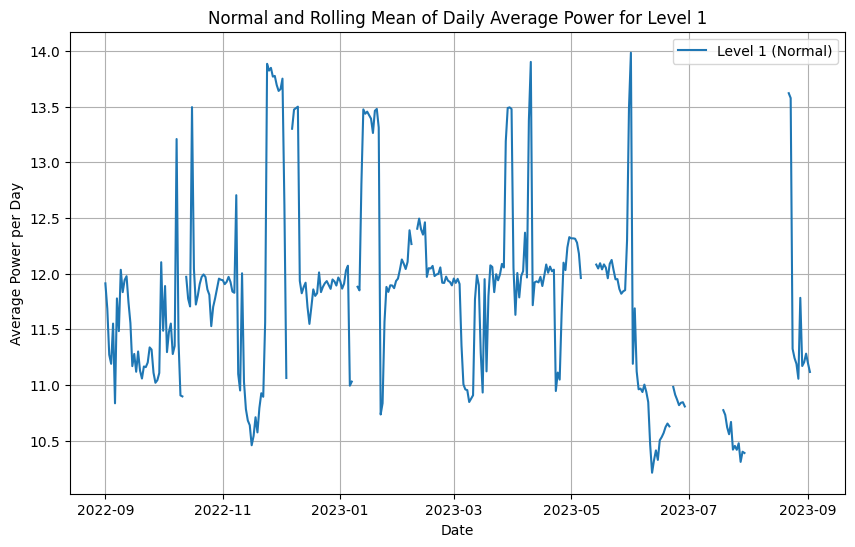

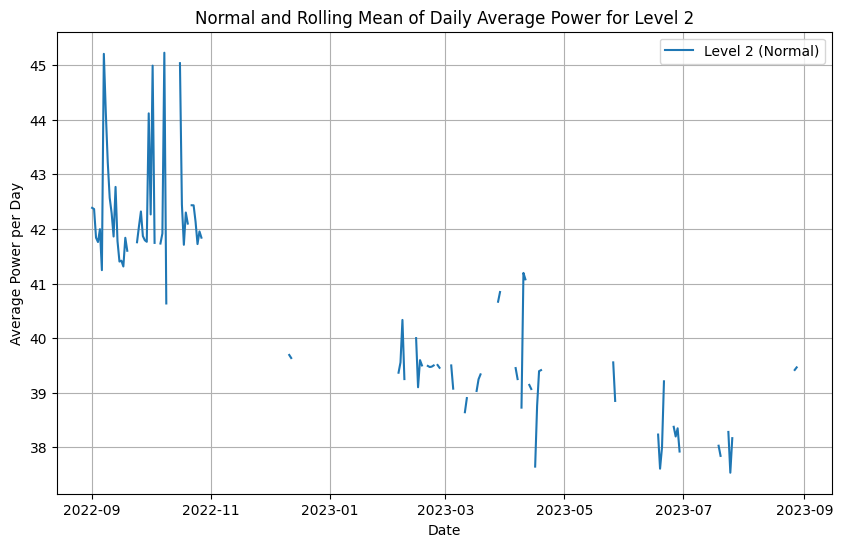

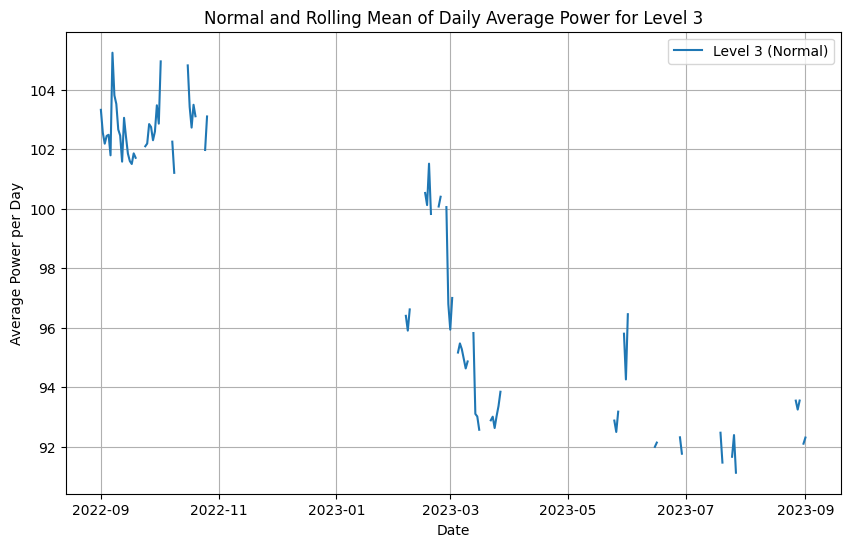

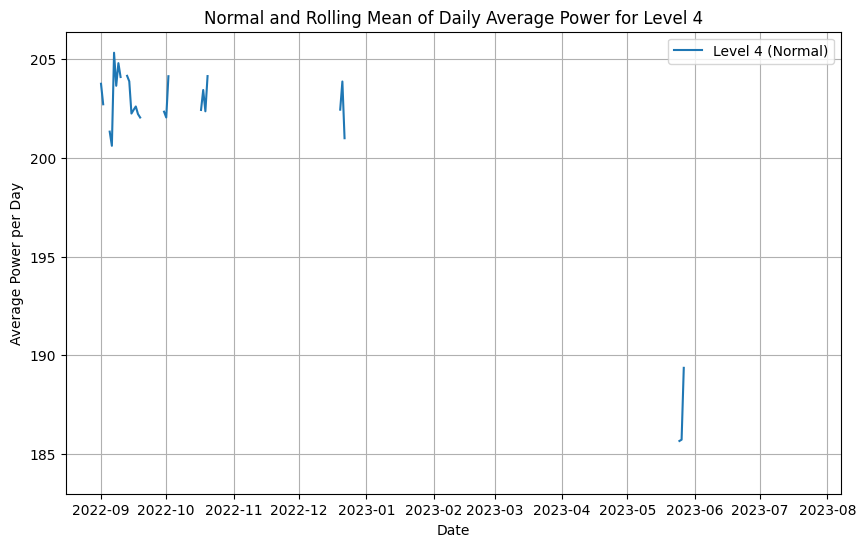

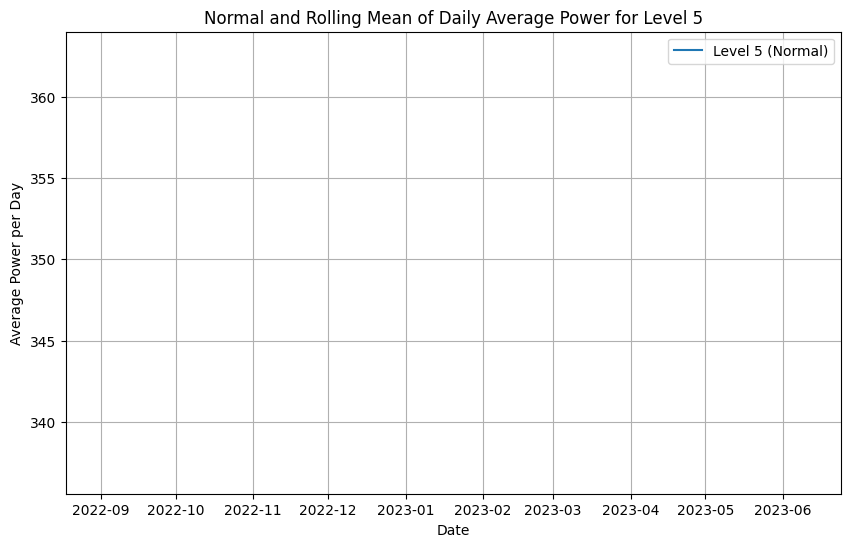

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

level_day2_list = [level1_full, level2_full, level3_full, level4_full, level5_full]

for i, level_df in enumerate(level_day2_list):
    level_df_concat = pd.concat(level_df, axis=1).T

    level_df_concat['time'] = pd.to_datetime(level_df_concat['time'])

    level_df_concat.set_index('time', inplace=True)

    daily_avg_power = level_df_concat['power'].resample('D').mean()

    # Calculate rolling mean of daily average power values
    rolling_mean_daily_avg_power = daily_avg_power.rolling(window=30, min_periods=1).mean()
    time_values = [pd.to_datetime(row['time']) for row in level_df]
    power_values = [row['power'] for row in level_df]
    # Plotting the time series graph for each level
    plt.figure(figsize=(10, 6))
    #plt.plot(time_values, power_values, label=f'Level {i+1}')
    plt.plot(daily_avg_power.index, daily_avg_power, label=f'Level {i+1} (Normal)')
    #plt.plot(rolling_mean_daily_avg_power.index, rolling_mean_daily_avg_power, label=f'Level {i+1} (Rolling Mean)')
    plt.xlabel('Date')
    plt.ylabel('Average Power per Day')
    plt.title(f'Normal and Rolling Mean of Daily Average Power for Level {i+1}')
    plt.legend()
    plt.grid(True)
    plt.show()


In [33]:
# Filter rows where the 'power' column value is equal to the max value 
rows_with_max_power = filtered_df_full[filtered_df_full['power'] == 18]

# Display or use the rows with the minimum 'power' value
print(rows_with_max_power)

                  name                      time        id         name.1  \
1031544  FanSpeedPower 2022-11-25 15:00:18+00:00  6BE6E2E0  AirMaster2000   

         power  speed_act  speed_set  
1031544     18        616        616  


In [36]:
level_day2_list = [level1_full]

for i, level_df in enumerate(level_day2_list):
    level_df_concat = pd.concat(level_df, axis=1).T

    level_df_concat['time'] = pd.to_datetime(level_df_concat['time'])

    level_df_concat.set_index('time', inplace=True)

    daily_avg_power = level_df_concat['power'].resample('D').mean()

In [37]:
daily_avg_power.to_csv('daily_average_lvl1.csv', index=False)

### TEST MERGE FSP 2022+2023

In [2]:
DF_FanSpeedPower = pd.read_csv('FanSpeedPower.csv')
DF_FanSpeedPower2 = pd.read_csv('FanSpeedPower2023.csv')


In [3]:
DF_FanSpeedPower = pd.concat([DF_FanSpeedPower, DF_FanSpeedPower2], ignore_index=True)


In [11]:
DF_FanSpeedPower

,name,time,id,name.1,power,speed_act,speed_set
0,FanSpeedPower,2022-07-29T04:01:41Z,6BE6E2E0,AirMaster2000,0,0,10
1,FanSpeedPower,2022-07-29T04:01:46Z,6BE6E2E0,AirMaster2000,14,600,616
2,FanSpeedPower,2022-07-29T04:01:52Z,6BE6E2E0,AirMaster2000,38,704,847
3,FanSpeedPower,2022-07-29T04:01:57Z,6BE6E2E0,AirMaster2000,44,974,975
4,FanSpeedPower,2022-07-29T04:02:02Z,6BE6E2E0,AirMaster2000,44,975,975
...,...,...,...,...,...,...,...
6811561,FanSpeedPower,2023-12-27T23:44:54Z,6BE6E2E0,M88,9,616,616
6811562,FanSpeedPower,2023-12-27T23:44:59Z,6BE6E2E0,M88,10,616,616
6811563,FanSpeedPower,2023-12-27T23:45:04Z,6BE6E2E0,M88,11,616,616
6811564,FanSpeedPower,2023-12-27T23:45:09Z,6BE6E2E0,M88,10,616,616


In [4]:
filtered_df_full1 = DF_FanSpeedPower[(DF_FanSpeedPower['speed_act'] == DF_FanSpeedPower['speed_set'])]
filtered_df_full1['time'] = pd.to_datetime(filtered_df_full1['time'])

filtered_df_full1 = filtered_df_full1[(filtered_df_full1['name.1'] == 'AirMaster2000') | (filtered_df_full1['name.1'] == 'M88')]

# Display or use the filtered DataFrame 'filtered_df_filtered'
print(filtered_df_full1)

C:\Users\Mathi\AppData\Local\Temp\ipykernel_11708\2960703354.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_full1['time'] = pd.to_datetime(filtered_df_full1['time'])


                  name                      time        id         name.1  \
4        FanSpeedPower 2022-07-29 04:02:02+00:00  6BE6E2E0  AirMaster2000   
5        FanSpeedPower 2022-07-29 04:02:18+00:00  6BE6E2E0  AirMaster2000   
6        FanSpeedPower 2022-07-29 04:02:23+00:00  6BE6E2E0  AirMaster2000   
7        FanSpeedPower 2022-07-29 04:02:28+00:00  6BE6E2E0  AirMaster2000   
8        FanSpeedPower 2022-07-29 04:02:49+00:00  6BE6E2E0  AirMaster2000   
...                ...                       ...       ...            ...   
6811560  FanSpeedPower 2023-12-27 23:44:49+00:00  6BE6E2E0            M88   
6811561  FanSpeedPower 2023-12-27 23:44:54+00:00  6BE6E2E0            M88   
6811562  FanSpeedPower 2023-12-27 23:44:59+00:00  6BE6E2E0            M88   
6811563  FanSpeedPower 2023-12-27 23:45:04+00:00  6BE6E2E0            M88   
6811564  FanSpeedPower 2023-12-27 23:45:09+00:00  6BE6E2E0            M88   

         power  speed_act  speed_set  
4           44        975        975

In [5]:

filtered_df_full1['time'] = pd.to_datetime(filtered_df_full1['time'])

mask = filtered_df_full1['time'].dt.strftime('%Y-%m').str.startswith('2022-08')

filtered_df = filtered_df_full1[mask]

# Inverting the mask to keep rows that do not start with '2022-08'
inverse_mask = ~mask

# Filtering the DataFrame to remove rows from '2022-08'
filtered_df_without_august = filtered_df_full1[inverse_mask]

mask_2 = filtered_df_full1['time'].dt.strftime('%Y-%m').str.startswith('2022-07')
inverse_mask2 = ~mask_2
filtered_df_without_august = filtered_df_without_august[inverse_mask2]



C:\Users\Mathi\AppData\Local\Temp\ipykernel_11708\675987676.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df_without_august = filtered_df_without_august[inverse_mask2]


In [6]:

# Filter 'speed_act' column in filtered_df2 where values are equal to 616
level1_full1 = []
level2_full2 = []
level3_full3 = []
level4_full4 = []
level5_full5 = []



for i, row in filtered_df_without_august.iterrows():
    if row['speed_act'] == 616:
        level1_full1.append(row)
    elif row ['speed_act'] == 975:
        level2_full2.append(row)
    elif row ['speed_act'] == 1335:
        level3_full3.append(row)
    elif row ['speed_act'] == 1695:
        level4_full4.append(row)
    elif row ['speed_act'] == 2054:
        level5_full5.append(row)

In [7]:
count_data_points1_day2 = len(level1_full1)  
print("Number of data points level1_day1:", count_data_points1_day2)
count_data_points2_day2 = len(level2_full2)  
print("Number of data points level2_day2:", count_data_points2_day2)
count_data_points3_day2 = len(level3_full3)  
print("Number of data points level3_day2:", count_data_points3_day2)
count_data_points4_day2 = len(level4_full4)  
print("Number of data points level4_day2:", count_data_points4_day2)
count_data_points5_day2 = len(level5_full5)  
print("Number of data points level5_day2:", count_data_points5_day2)

Number of data points level1_day1: 4843027
Number of data points level2_day2: 106959
Number of data points level3_day2: 60129
Number of data points level4_day2: 4002
Number of data points level5_day2: 645


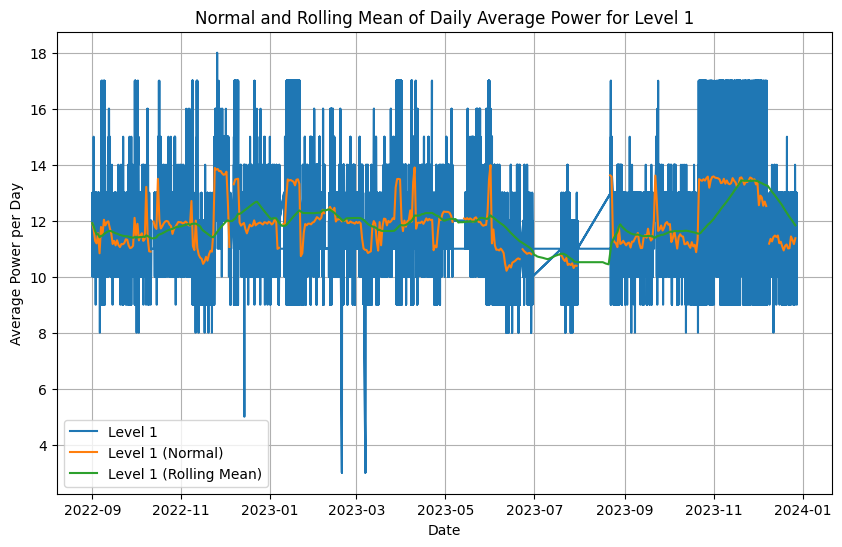

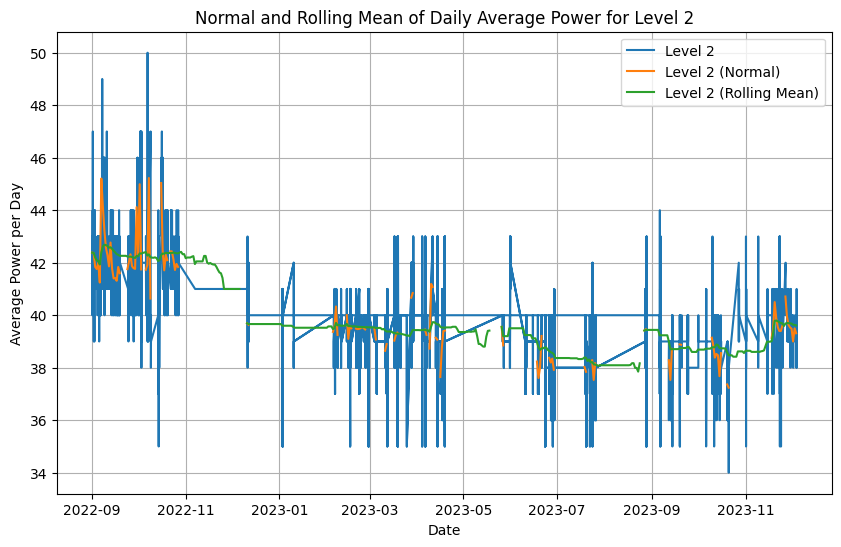

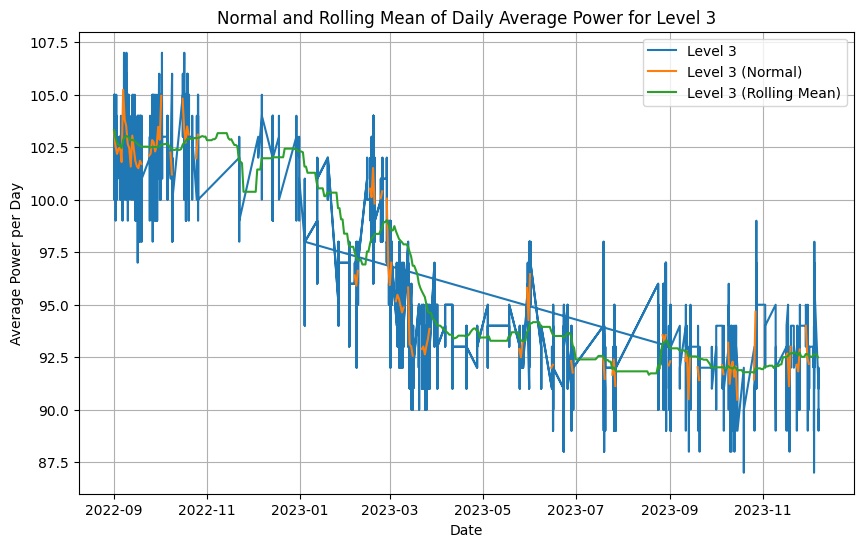

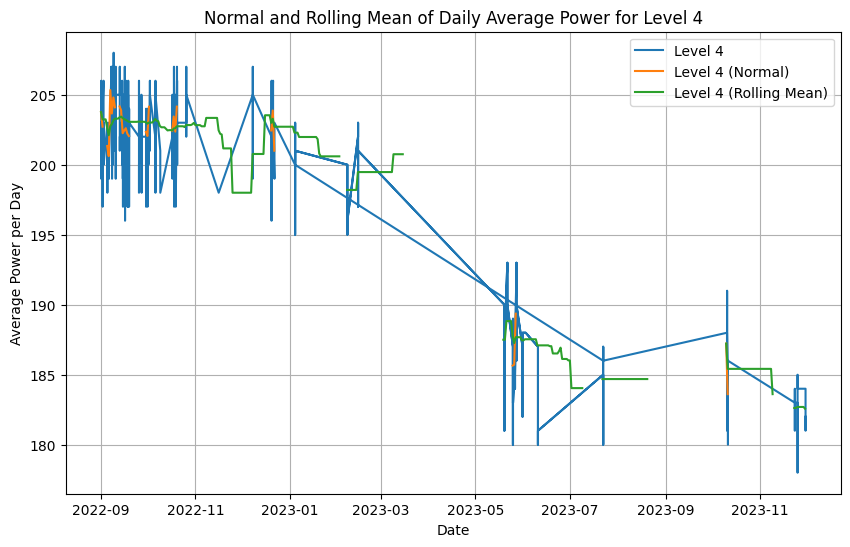

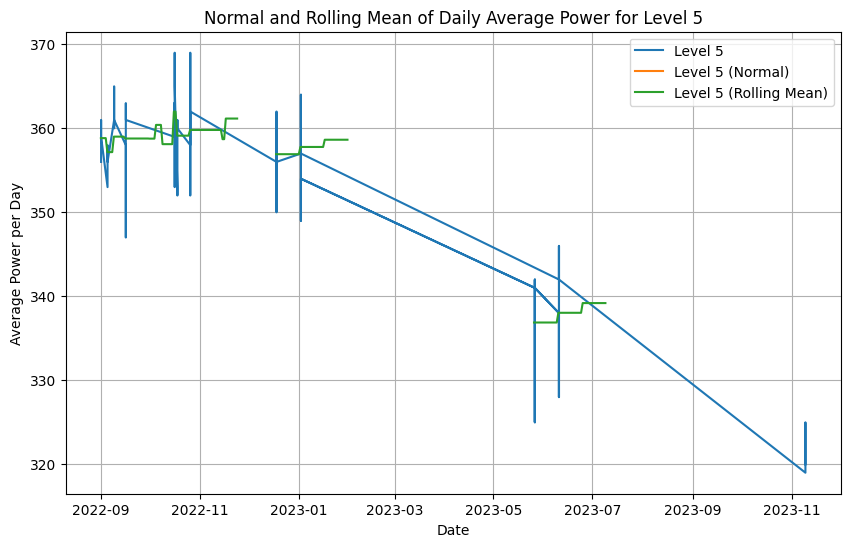

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

level_day2_list = [level1_full1, level2_full2, level3_full3, level4_full4, level5_full5]

for i, level_df in enumerate(level_day2_list):
    level_df_concat = pd.concat(level_df, axis=1).T

    level_df_concat['time'] = pd.to_datetime(level_df_concat['time'])

    level_df_concat.set_index('time', inplace=True)

    daily_avg_power = level_df_concat['power'].resample('D').mean()
    daily_std_power = level_df_concat['power'].resample('D').std()
    #daily_q25_power = level_df_concat['power'].resample('D').quantile(0.25)
    #daily_q75_power = level_df_concat['power'].resample('D').quantile(0.75)



    # Calculate rolling mean of daily average power values
    rolling_mean_daily_avg_power = daily_avg_power.rolling(window=30, min_periods=1).mean()
    time_values = [pd.to_datetime(row['time']) for row in level_df]
    power_values = [row['power'] for row in level_df]
    # Plotting the time series graph for each level
    plt.figure(figsize=(10, 6))
    plt.plot(time_values, power_values, label=f'Level {i+1}')
    plt.plot(daily_avg_power.index, daily_avg_power, label=f'Level {i+1} (Normal)')
    plt.plot(rolling_mean_daily_avg_power.index, rolling_mean_daily_avg_power, label=f'Level {i+1} (Rolling Mean)')
    plt.xlabel('Date')
    plt.ylabel('Average Power per Day')
    plt.title(f'Normal and Rolling Mean of Daily Average Power for Level {i+1}')
    plt.legend()
    plt.grid(True)
    plt.show()
